## Playing around with DHS API
- https://api.dhsprogram.com
- Visualizing the components of ANC care by country, over time


## Resources: 
- List of Indicators: https://api.dhsprogram.com/rest/dhs/indicators?returnFields=IndicatorId,Label,Definition&f=html
- Advanced queries: https://api.dhsprogram.com/#/api-advancedqueries.cfm

In [1]:
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import requests
from ipywidgets import interactive

In [2]:
#Abbreviations for indicator names
indicator_codebook = {
    'RH_ANCC_W_IRN':'Received iron tablets or syrup',
    'RH_ANCC_W_PAR':'Took intestinal parasite drugs',
    'RH_ANCS_W_SGN':'Informed of signs of complications',
    'RH_ANCS_W_WGT':'Weight measured',
    'RH_ANCS_W_HGT':'Height measured',
    'RH_ANCS_W_BLP':'Blood pressure measured',
    'RH_ANCS_W_URN':'Urine sample taken',
    'RH_ANCS_W_BLS':'Blood sample taken',
    'ML_IPTP_W_SPA':'ANC_Fansidar',
    'HA_CATH_W_CSL':'ANC HIV counseling',
}

In [3]:
#Load country codebook
r = requests.get('https://api.dhsprogram.com/rest/dhs/countries')
countries = pd.DataFrame(r.json()['Data'])[['DHS_CountryCode','CountryName']]
country_dict = countries.set_index('CountryName').to_dict()
country_dict = country_dict['DHS_CountryCode']

In [4]:
def interactive_plot(location = 'Malawi'):
    locid = country_dict[f'{location}']
    indicator_ids = 'RH_ANCC_W_IRN,RH_ANCC_W_PAR,RH_ANCS_W_SGN,RH_ANCS_W_WGT,RH_ANCS_W_HGT,RH_ANCS_W_BLP,RH_ANCS_W_URN,RH_ANCS_W_BLS,ML_IPTP_W_SPA,HA_CATH_W_CSL'
    fields = 'CountryName,SurveyYear,Indicator,IndicatorId,ByVariableId,Value'
    
    data_url = 'https://api.dhsprogram.com/rest/dhs/data?countryIds=' + locid + '&indicatorIds=' + indicator_ids + '&returnFields=' + fields
    
    r = requests.get(data_url)
    df = pd.DataFrame(r.json()['Data']).query('ByVariableId == 14001') #only look at 5 years preceding survey (not 3)
    df['Indicator_name_short'] = df.IndicatorId.map(indicator_codebook)
   
    g = sns.factorplot("Value", "Indicator_name_short",row="SurveyYear", data=df, kind="bar",size=2, aspect=4)

In [5]:
locs = countries.CountryName.unique().tolist()
w = interactive(interactive_plot, location = locs)

display(w)

interactive(children=(Dropdown(description='location', index=47, options=('Afghanistan', 'Albania', 'Angola', …

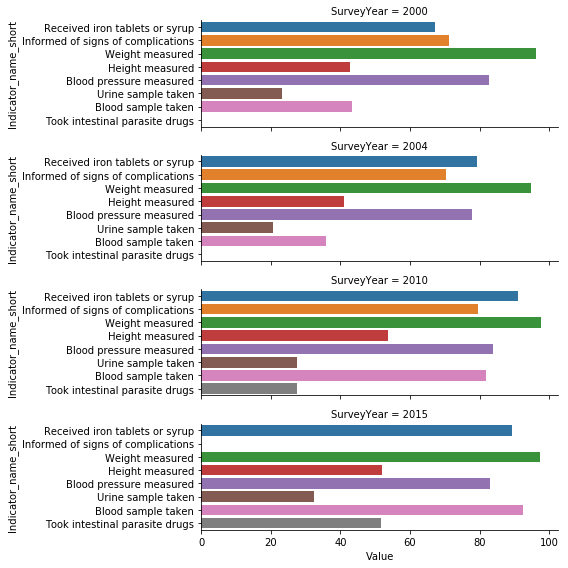

In [6]:
#EXAMPLE OUTPUT (since interactive widget doesn't render in HTML)
interactive_plot('Malawi')

## SCRATCH 

In [7]:
from math import pi
df_plot = df.query('SurveyYear == 2014')

# number of variable
categories = df_plot.Indicator.unique().tolist()
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df_plot.Value.tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,25,50,75,100], ["10","20","30"], color="grey", size=7)
plt.ylim(0,100)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


NameError: name 'df' is not defined